In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import sys
sys.path.append('../second.pytorch/')
from nuscenes import NuScenes
from lyft_dataset_sdk import lyftdataset 
import json
%matplotlib inline

### NuScene EDA


In [2]:
lyft = NuScenes(dataroot='../data/lyft/train/', version = 'v1.0-trainval')

Loading NuScenes tables for version v1.0-trainval...
9 category,
18 attribute,
4 visibility,
18421 instance,
10 sensor,
148 calibrated_sensor,
177789 ego_pose,
180 log,
180 scene,
22680 sample,
189504 sample_data,
638179 sample_annotation,
1 map,
Done loading in 11.3 seconds.
Reverse indexing ...
Done reverse indexing in 2.5 seconds.


In [8]:
lyft.scene[0]

{'log_token': 'da4ed9e02f64c544f4f1f10c6738216dcb0e6b0d50952e158e5589854af9f100',
 'first_sample_token': '24b0962e44420e6322de3f25d9e4e5cc3c7a348ec00bfa69db21517e4ca92cc8',
 'name': 'host-a101-lidar0-1241893239199111666-1241893264098084346',
 'description': '',
 'last_sample_token': '2346756c83f6ae8c4d1adec62b4d0d31b62116d2e1819e96e9512667d15e7cec',
 'nbr_samples': 126,
 'token': 'da4ed9e02f64c544f4f1f10c6738216dcb0e6b0d50952e158e5589854af9f100'}

In [4]:
defective_lidar = 'lidar/host-a011_lidar1_1233090652702363606.bin'
for sample in lyft.sample:
    lidar = lyft.get('sample_data', sample['data']['LIDAR_TOP'])
    if lidar['filename'] == defective_lidar:
        print(sample['scene_token'])
        print(sample['token'])
        scene = lyft.get('scene', sample['scene_token'])
        print(scene['name'])

190708008d931a47a502920d034f0f1ec8ad874aa4eb23bd7cbea26e34146542
9cb04b1a4d476fd0782431764c7b55e91c6dbcbc6197c3dab3e044f13d058011
host-a011-lidar0-1233090630199206666-1233090655098843996


In [32]:
sample_token = '9cb04b1a4d476fd0782431764c7b55e91c6dbcbc6197c3dab3e044f13d058011'
sample = lyft.get('sample', sample_token)
lidar = lyft.get('sample_data', sample['data']['LIDAR_TOP'])
lidar, lyft.get('scene', sample['scene_token'])['name']

({'sample_token': '9cb04b1a4d476fd0782431764c7b55e91c6dbcbc6197c3dab3e044f13d058011',
  'is_key_frame': True,
  'prev': '94c3975b41e233fac861360b13cc935f145114047a46dd714b154665a794a55b',
  'fileformat': 'bin',
  'token': '25cca7dd22b1f0a2c7664ddfa285694193a80d033896d4df70cb0e29a3d466e2',
  'timestamp': 1549055452702363.5,
  'next': '45f45f183f53535a28379bc642f3de2036b3ce77e352ddc1cf48406d1a6738fb',
  'ego_pose_token': '70b28465c169be5f0dc35e83d1c3d7d3a3cee48e39c3f501be8f8d5ee35d482e',
  'calibrated_sensor_token': '043947e092f2df7723186143caafad12b5f4ae51328ce04e09f0d3a351663849',
  'filename': 'lidar/host-a011_lidar1_1233090652702363606.bin',
  'sensor_modality': 'lidar',
  'channel': 'LIDAR_TOP'},
 'host-a011-lidar0-1233090630199206666-1233090655098843996')

In [52]:
lidar_path = '../data/lyft/train/' + lidar['filename']
points = np.fromfile(
        str('test.bin'), dtype=np.float32, count=-1).reshape([-1, 5])
new_points = np.array(list(points) + [100.0, 1.0], dtype='float32')
new_points.shape, new_points.dtype
new_points.tofile(lidar_path)

(53146, 5)

In [45]:
new_points = np.array(list(points) + [100.0, 1.0], dtype='float32')
new_points.shape, new_points.dtype

((265730,), dtype('float32'))

In [53]:
points[:, 4]

array([1., 1., 1., ..., 1., 1., 1.], dtype=float32)

In [55]:
new_points.tofile(lidar_path)

In [56]:
!cp {lidar_path} .

In [48]:
!ls test* 

test.bin.npy


In [25]:
lyft.render_sample_data(lidar['token'])

ValueError: cannot reshape array of size 265728 into shape (5)

In [51]:
names.remove('host-a011-lidar0-1233090630199206666-1233090655098843996')

In [52]:
defective_scene = 'host-a011-lidar0-1233090630199206666-1233090655098843996'
defective_scene in names

False

In [34]:
import random
random.seed(69)
names = [s['name'] for s in lyft.scene]
val_scenes = random.choices(names, k=int(0.2 * len(names)))
train_scenes = [s for s in names if s not in val_scenes]
len(val_scenes), len(train_scenes)

(36, 148)

In [7]:
defective = [name for name in names if 'host-a011' in name]
# defective

In [35]:
val_scenes[0]

'host-a012-lidar0-1237329862198269106-1237329887099105436'

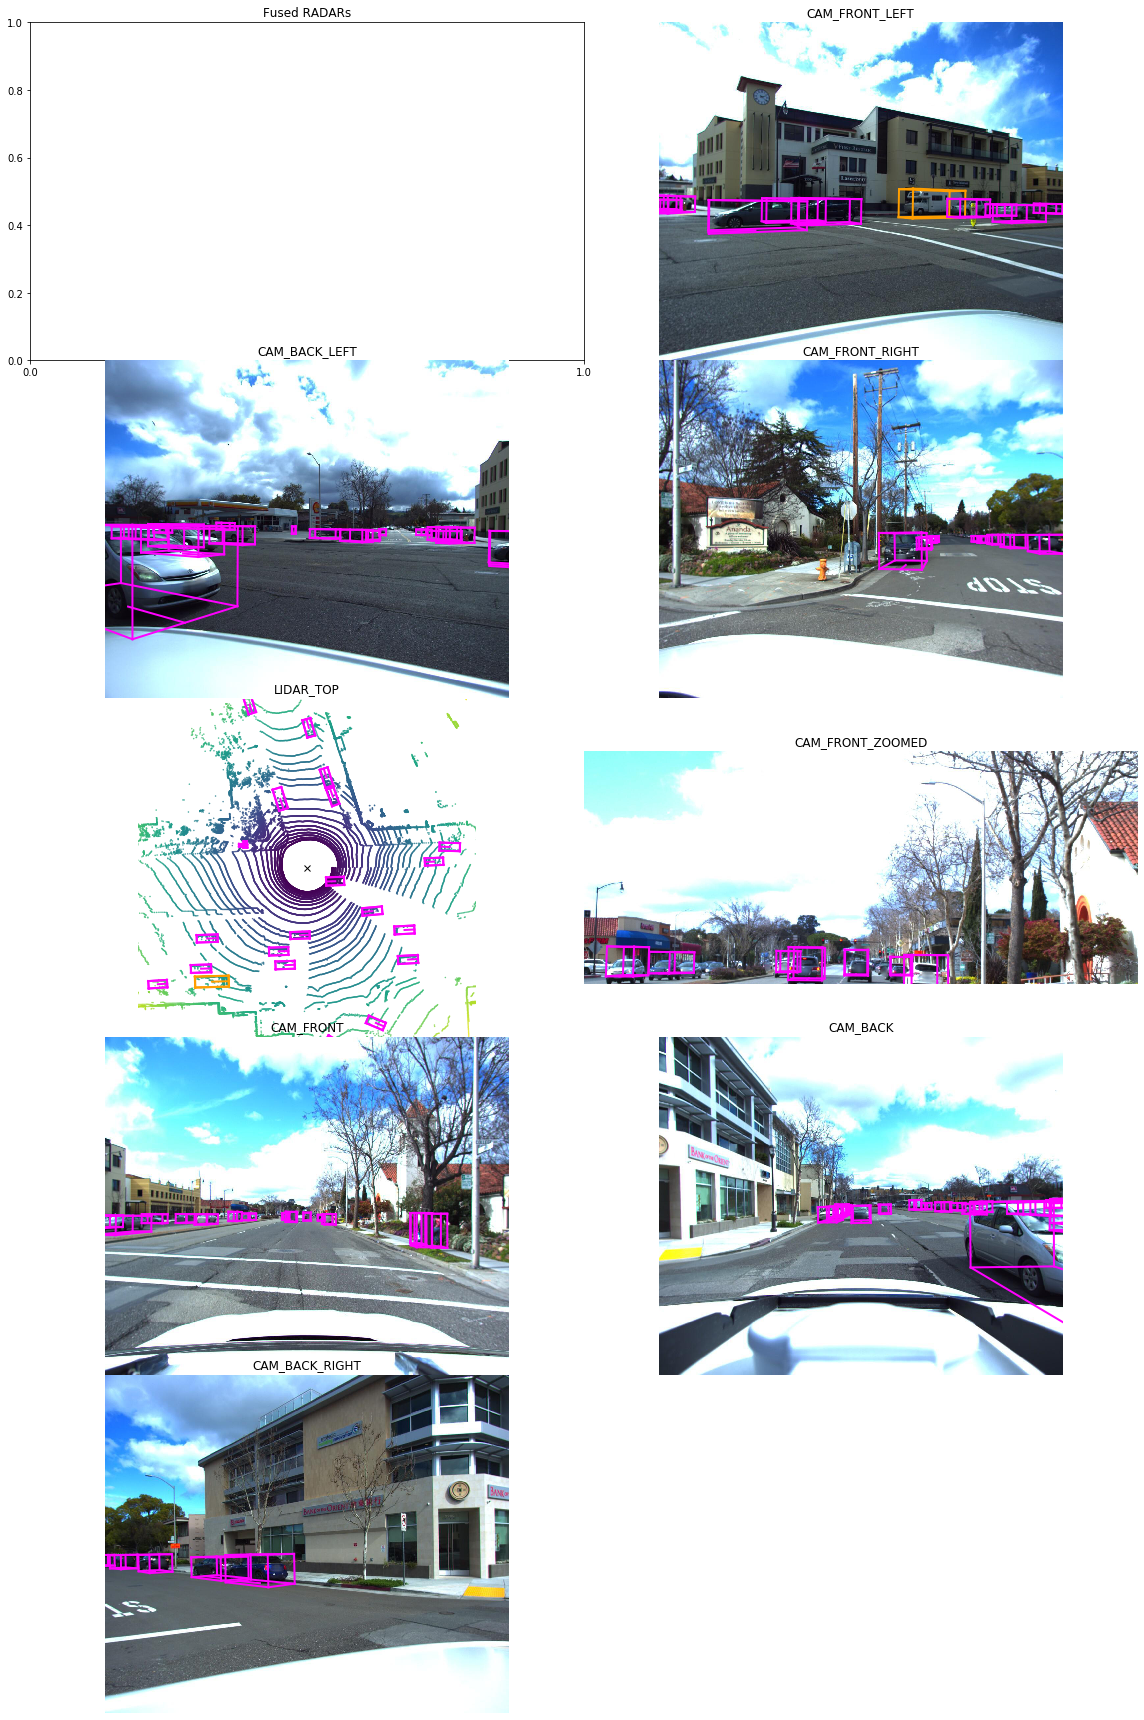

In [8]:
lyft.render_sample(lyft.sample[0]['token'])

In [16]:
!head ../data/lyft/sample_submission.csv

Id,PredictionString
7eb3e546df5311b035f1d4b7e88351ffdd85f311ef1bdd22f71a160e92386fed,
a76d702996a086ecd4add92b6c533b76f0ab1dd35a47295a618c16cbfd529b6e,
a9919963e5cd83d12b60bb9c386869ecb4dffcf2e3c401829965ea04a340b3b4,
e3f42dc16cb366723699a5e12098edb56907d676cb5720cde10f1d6d3a41d6e1,
033edef20c7f951738c037c0275dc02279a15454fda3e6e269d215ad2acc66c7,
c386141fc79587ed49ba0a9acd59c10d3d2c10e7b99479fd156da084a7082a15,
c7b0095cd5470e9a4624ebcc83fca08654c4bd4996198b1614ec19216994a56c,
f0229692c5f71e0893300e9632ff4ca2ec4e1da8fa09c56ff9d182acdc295efb,
bb6a9e8ff8f6efe84f3d81232d694c42dd197dbe7749e924dcdb7e4d9af79a52,


In [8]:
nusc = NuScenes(dataroot='../data/nuscenes/v1.0-mini/')

Loading NuScenes tables for version v1.0-mini...
23 category,
8 attribute,
4 visibility,
911 instance,
12 sensor,
120 calibrated_sensor,
31206 ego_pose,
8 log,
10 scene,
404 sample,
31206 sample_data,
18538 sample_annotation,
4 map,
Done loading in 0.7 seconds.
Reverse indexing ...
Done reverse indexing in 0.1 seconds.


In [18]:
nusc.list_categories()

Category stats for split v1.0-mini:
human.pedestrian.adult      n= 4765, width= 0.68±0.11, len= 0.73±0.17, height= 1.76±0.12, lw_aspect= 1.08±0.23
human.pedestrian.child      n=   46, width= 0.46±0.08, len= 0.45±0.09, height= 1.37±0.06, lw_aspect= 0.97±0.05
human.pedestrian.constructi n=  193, width= 0.69±0.07, len= 0.74±0.12, height= 1.78±0.05, lw_aspect= 1.07±0.16
human.pedestrian.personal_m n=   25, width= 0.83±0.00, len= 1.28±0.00, height= 1.87±0.00, lw_aspect= 1.55±0.00
human.pedestrian.police_off n=   11, width= 0.59±0.00, len= 0.47±0.00, height= 1.81±0.00, lw_aspect= 0.80±0.00
movable_object.barrier      n= 2323, width= 2.32±0.49, len= 0.61±0.11, height= 1.06±0.10, lw_aspect= 0.28±0.09
movable_object.debris       n=   13, width= 0.43±0.00, len= 1.43±0.00, height= 0.46±0.00, lw_aspect= 3.35±0.00
movable_object.pushable_pul n=   82, width= 0.51±0.06, len= 0.79±0.10, height= 1.04±0.20, lw_aspect= 1.55±0.18
movable_object.trafficcone  n= 1378, width= 0.47±0.14, len= 0.45±0.07, heigh

In [52]:
lyft.list_categories()

Category stats for split v1.0-trainval:
animal                      n=  186, width= 0.36±0.12, len= 0.73±0.19, height= 0.51±0.16, lw_aspect= 2.16±0.56
bicycle                     n=20928, width= 0.63±0.24, len= 1.76±0.29, height= 1.44±0.37, lw_aspect= 3.20±1.17
bus                         n= 8729, width= 2.96±0.24, len=12.34±3.41, height= 3.44±0.31, lw_aspect= 4.17±1.10
car                         n=534911, width= 1.93±0.16, len= 4.76±0.53, height= 1.72±0.24, lw_aspect= 2.47±0.22
emergency_vehicle           n=  132, width= 2.45±0.43, len= 6.52±1.44, height= 2.39±0.59, lw_aspect= 2.66±0.28
motorcycle                  n=  818, width= 0.96±0.20, len= 2.35±0.22, height= 1.59±0.16, lw_aspect= 2.53±0.50
other_vehicle               n=33376, width= 2.79±0.30, len= 8.20±1.71, height= 3.23±0.50, lw_aspect= 2.93±0.53
pedestrian                  n=24935, width= 0.77±0.14, len= 0.81±0.17, height= 1.78±0.16, lw_aspect= 1.06±0.20
truck                       n=14164, width= 2.84±0.32, len=10.24±4.09, 

In [19]:
nusc.list_attributes()

cycle.with_rider: 305
cycle.without_rider: 434
pedestrian.moving: 3875
pedestrian.sitting_lying_down: 111
pedestrian.standing: 1029
vehicle.moving: 2715
vehicle.parked: 4674
vehicle.stopped: 1545


In [51]:
lyft.list_attributes()

is_stationary: 321981
object_action_abnormal_or_traffic_violation: 2
object_action_driving_straight_forward: 244805
object_action_gliding_on_wheels: 165
object_action_lane_change_left: 1463
object_action_lane_change_right: 1370
object_action_left_turn: 5074
object_action_loss_of_control: 1
object_action_other_motion: 582
object_action_parked: 257939
object_action_reversing: 278
object_action_right_turn: 6694
object_action_running: 621
object_action_sitting: 586
object_action_standing: 5332
object_action_stopped: 94970
object_action_u_turn: 407
object_action_walking: 17890


In [26]:
sample = nusc.sample[0]
ann = sample['anns'][0]
nusc.get('sample_annotation', ann)

{'token': 'ef63a697930c4b20a6b9791f423351da',
 'sample_token': 'ca9a282c9e77460f8360f564131a8af5',
 'instance_token': '6dd2cbf4c24b4caeb625035869bca7b5',
 'visibility_token': '1',
 'attribute_tokens': ['4d8821270b4a47e3a8a300cbec48188e'],
 'translation': [373.256, 1130.419, 0.8],
 'size': [0.621, 0.669, 1.642],
 'rotation': [0.9831098797903927, 0.0, 0.0, -0.18301629506281616],
 'prev': '',
 'next': '7987617983634b119e383d8a29607fd7',
 'num_lidar_pts': 1,
 'num_radar_pts': 0,
 'category_name': 'human.pedestrian.adult'}

In [54]:
sample = lyft.sample[0]
ann = sample['anns'][0]
lyft.get('sample_annotation', ann)

{'token': 'f30671d90a0819accc152fc4b9028842e044956ba748c19dc31066280380b0c7',
 'num_lidar_pts': -1,
 'size': [1.889, 4.852, 1.829],
 'sample_token': 'b98a05255ba2632e957884758cb31f0e6fcc8d3cd6ee76b6d0ba55b72f08fc54',
 'rotation': [0.27834486968982886, 0, 0, 0.9604811989400689],
 'prev': '05af81c6fbab3f9c17f80c8484f3271519238b9c6529419a78bc178f0f7839fe',
 'translation': [1134.216191599088, 1650.4749269743418, -23.38887732990988],
 'num_radar_pts': 0,
 'attribute_tokens': ['7fc1ca3d36808cd1858e9c01ad4e7630ff3ca9e720065034abd244122646acc8'],
 'next': '9256e8049bdaff6f6a6e462dacf70c511c7650444782d12e6c586984bdb85a63',
 'instance_token': 'a62bdec26059db3c74b53bc473ae1b4f1e3f406fa047f1ac9701e8297bde439d',
 'visibility_token': '',
 'category_name': 'car'}

In [6]:
categories = lyft.category
[c['name'] for c in categories]

['car',
 'pedestrian',
 'animal',
 'other_vehicle',
 'bus',
 'motorcycle',
 'truck',
 'emergency_vehicle',
 'bicycle']

In [53]:
categories = lyft.category
[c['name'] for c in categories]

['car',
 'pedestrian',
 'animal',
 'other_vehicle',
 'bus',
 'motorcycle',
 'truck',
 'emergency_vehicle',
 'bicycle']

In [7]:
attrs = lyft.attribute
[at['name'] for at in attrs]

['object_action_lane_change_right',
 'object_action_running',
 'object_action_lane_change_left',
 'object_action_parked',
 'object_action_standing',
 'object_action_right_turn',
 'object_action_gliding_on_wheels',
 'object_action_loss_of_control',
 'object_action_u_turn',
 'object_action_sitting',
 'object_action_walking',
 'object_action_stopped',
 'object_action_left_turn',
 'object_action_reversing',
 'is_stationary',
 'object_action_driving_straight_forward',
 'object_action_abnormal_or_traffic_violation',
 'object_action_other_motion']

In [15]:
nusc.scene[0]['name']

'scene-0061'

In [6]:
len(nusc.sample)

404

In [7]:
sample = nusc.sample[0]
lidar_token = sample["data"]["LIDAR_TOP"]
cam_front_token = sample["data"]["CAM_FRONT"]
sd_rec = nusc.get('sample_data', sample['data']["LIDAR_TOP"])
cs_record = nusc.get('calibrated_sensor',
                     sd_rec['calibrated_sensor_token'])
pose_record = nusc.get('ego_pose', sd_rec['ego_pose_token'])
lidar_path, boxes, _ = nusc.get_sample_data(lidar_token)

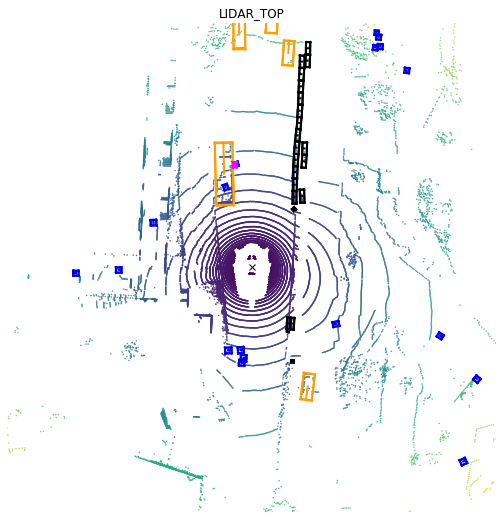

In [9]:
nusc.render_sample_data(lidar_token)

In [41]:
sample['token'], sd_rec['token']

('356d81f38dd9473ba590f39e266f54e5', '28aaabeb212146a28a511858c09cf20c')

In [42]:
sample['prev'] #    "prev":                    <str> -- Foreign key. Sample that precedes this in time. Empty if start of scene.

'39586f9d59004284a7114a68825e8eec'

In [43]:
sd_rec['prev'] #    "prev":                    <str> -- Foreign key. Sample data from the same sensor that precedes this in time. Empty if start of scene.

'46aae6c1703e4bd08b4e1d2918eaf724'

In [47]:
nusc.get('sample_data', sd_rec['token'])

{'token': '28aaabeb212146a28a511858c09cf20c',
 'sample_token': '356d81f38dd9473ba590f39e266f54e5',
 'ego_pose_token': '28aaabeb212146a28a511858c09cf20c',
 'calibrated_sensor_token': 'a183049901c24361a6b0b11b8013137c',
 'timestamp': 1532402928698048,
 'fileformat': 'pcd',
 'is_key_frame': True,
 'height': 0,
 'width': 0,
 'filename': 'samples/LIDAR_TOP/n015-2018-07-24-11-22-45+0800__LIDAR_TOP__1532402928698048.pcd.bin',
 'prev': '46aae6c1703e4bd08b4e1d2918eaf724',
 'next': 'b0a057549fb24e938f94f717c4f7446a',
 'sensor_modality': 'lidar',
 'channel': 'LIDAR_TOP'}

In [46]:
nusc.get('sample_data','6c68f70d05d74994817f11131fb21f3d')

{'token': '6c68f70d05d74994817f11131fb21f3d',
 'sample_token': '39586f9d59004284a7114a68825e8eec',
 'ego_pose_token': '6c68f70d05d74994817f11131fb21f3d',
 'calibrated_sensor_token': 'a183049901c24361a6b0b11b8013137c',
 'timestamp': 1532402928098063,
 'fileformat': 'pcd',
 'is_key_frame': False,
 'height': 0,
 'width': 0,
 'filename': 'sweeps/LIDAR_TOP/n015-2018-07-24-11-22-45+0800__LIDAR_TOP__1532402928098063.pcd.bin',
 'prev': 'f9e41eadc16247e58dc3b9119c607923',
 'next': '4f792c8da81e4cb7aca1790654da1c27',
 'sensor_modality': 'lidar',
 'channel': 'LIDAR_TOP'}

In [48]:
nusc.get('sample', '39586f9d59004284a7114a68825e8eec')

{'token': '39586f9d59004284a7114a68825e8eec',
 'timestamp': 1532402928147847,
 'prev': 'ca9a282c9e77460f8360f564131a8af5',
 'next': '356d81f38dd9473ba590f39e266f54e5',
 'scene_token': 'cc8c0bf57f984915a77078b10eb33198',
 'data': {'RADAR_FRONT': 'b70cefb08263499eb30c7e7da0031428',
  'RADAR_FRONT_LEFT': 'b5cd02b25f0944f19c0d123fa1fc54ec',
  'RADAR_FRONT_RIGHT': '9b628ce4952a4a839962b77a76630e23',
  'RADAR_BACK_LEFT': '28b610ada2b545d1a5a1bf9d08af0285',
  'RADAR_BACK_RIGHT': '07a62118eb3b43ffa1d833f250ff6f80',
  'LIDAR_TOP': '4f792c8da81e4cb7aca1790654da1c27',
  'CAM_FRONT': '4b6870ae200c4b969b91c50a9737f712',
  'CAM_FRONT_RIGHT': '5c026763ad8146e89c6ee53da26331dc',
  'CAM_BACK_RIGHT': 'c339f7629fdf4c219e30ca1790b53773',
  'CAM_BACK': '661d9842bbb44b208f867f2061c4f535',
  'CAM_BACK_LEFT': '9320f00a62c24b80972048de7a742b4c',
  'CAM_FRONT_LEFT': '2b9d52c5c777455eb31831860c6fc117'},
 'anns': ['7987617983634b119e383d8a29607fd7',
  '216bbbd8e01c450a8fabe9d47433c10a',
  'f0cbd9dbafd74e20bcf6dd0

In [12]:
annotations = [
    nusc.get('sample_annotation', token)
    for token in sample['anns']
]


In [18]:
nusc.box_velocity

<bound method NuScenes.box_velocity of <nuscenes.nuscenes.NuScenes object at 0x7fd36e3a6450>>

In [33]:
sample = nusc.sample[1]
lidar_token = sample["data"]["LIDAR_TOP"]
cam_front_token = sample["data"]["CAM_FRONT"]
sd_rec = nusc.get('sample_data', sample['data']["LIDAR_TOP"])
cs_record = nusc.get('calibrated_sensor',
                     sd_rec['calibrated_sensor_token'])
pose_record = nusc.get('ego_pose', sd_rec['ego_pose_token'])
lidar_path, boxes, _ = nusc.get_sample_data(lidar_token)

In [34]:
sample['prev'], sd_rec['prev']

('ca9a282c9e77460f8360f564131a8af5', '6c68f70d05d74994817f11131fb21f3d')

### KITTI EDA

In [4]:
!ls ../PointRCNN/data/KITTI/

ImageSets  object


In [2]:
!ls ../data/train_data

attribute.json		log.json		scene.json
calibrated_sensor.json	map.json		sensor.json
category.json		sample_annotation.json	visibility.json
ego_pose.json		sample_data.json
instance.json		sample.json


In [3]:
attribute = json.load(open('../data/train_data/attribute.json'))
calibrated_sensor = json.load(open('../data/train_data/calibrated_sensor.json'))
category = json.load(open('../data/train_data/category.json'))
ego_pose = json.load(open('../data/train_data/ego_pose.json'))
instance = json.load(open('../data/train_data/instance.json'))
sample_data = json.load(open('../data/train_data/sample_data.json'))
sample_annotation = json.load(open('../data/train_data/sample_annotation.json'))
map_json = json.load(open('../data/train_data/map.json'))
log = json.load(open('../data/train_data/log.json'))
sample = json.load(open('../data/train_data/sample.json'))
scene = json.load(open('../data/train_data/scene.json'))
sensor = json.load(open('../data/train_data/sensor.json'))
visibility = json.load(open('../data/train_data/visibility.json'))

In [9]:
for d in category:
    print(d['name'])

car
pedestrian
animal
other_vehicle
bus
motorcycle
truck
emergency_vehicle
bicycle


In [10]:
#9 categories

In [30]:
import pandas as pd
train_df = pd.read_csv('../data/lyft/train.csv')
test_df = pd.read_csv('../data/lyft/sample_submission.csv')

In [31]:
train_df.shape, test_df.shape

((22680, 2), (27468, 2))

In [32]:
train_df.head()

,Id,PredictionString
0,db8b47bd4ebdf3b3fb21598bb41bd8853d12f8d2ef25ce...,2680.2830359778527 698.1969292852777 -18.04776...
1,edf37c1fb1024ba0c1f53ebbf10b6797f781199a9f0e4e...,1208.642684768659 1585.1812946970927 -23.56236...
2,1841b7895e7163a2c1be87e8c1740e759a910cd59157b8...,848.9346793681768 2587.2870557176507 -20.15995...
3,a970c764e7abd7ebc2cc4599a6e3ae58c9773ea3c9cf1d...,1994.4320280494098 1128.30164336183 -18.054752...
4,b909de93ba19460eeea58074ccc1ef6bb302435f37b48c...,1030.3877156973385 1667.13131694941 -23.764820...


In [33]:

img_id = train_df.iloc[0]['Id']
ps = train_df.iloc[0]['PredictionString']
ps = ps.split()
objects = [ps[x:x+8] for x in range(0, len(ps), 8)]
len(objects)

In [34]:
objects = [ps[x:x+8] for x in range(0, len(ps), 8)]
len(objects)

52

In [40]:
train_df.head()

,Id,PredictionString,filename
0,db8b47bd4ebdf3b3fb21598bb41bd8853d12f8d2ef25ce...,2680.2830359778527 698.1969292852777 -18.04776...,
1,edf37c1fb1024ba0c1f53ebbf10b6797f781199a9f0e4e...,1208.642684768659 1585.1812946970927 -23.56236...,
2,1841b7895e7163a2c1be87e8c1740e759a910cd59157b8...,848.9346793681768 2587.2870557176507 -20.15995...,
3,a970c764e7abd7ebc2cc4599a6e3ae58c9773ea3c9cf1d...,1994.4320280494098 1128.30164336183 -18.054752...,
4,b909de93ba19460eeea58074ccc1ef6bb302435f37b48c...,1030.3877156973385 1667.13131694941 -23.764820...,


In [49]:
overall = []
for i in range(len(train_df)):
    img_id = train_df.iloc[i]['Id']
    ps = train_df.iloc[i]['PredictionString']
    ps = ps.split()
    objects = [ps[x:x+8] for x in range(0, len(ps), 8)]
    classes = [o[-1] for o in objects]
    overall.extend(classes)
overall = list(set(overall))

In [50]:
overall

['emergency_vehicle',
 'pedestrian',
 'motorcycle',
 'car',
 'truck',
 'other_vehicle',
 'bicycle',
 'animal',
 'bus']